In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np

In [13]:
epochs = mne.read_epochs('A01T_ica_epo.fif')

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\A01T_ica_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    3500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated


In [14]:
left_epoch = epochs['769']
right_epoch = epochs['770']
foot_epoch = epochs['771']
tongue_epoch = epochs['772']

    Using multitaper spectrum estimation with 7 DPSS windows


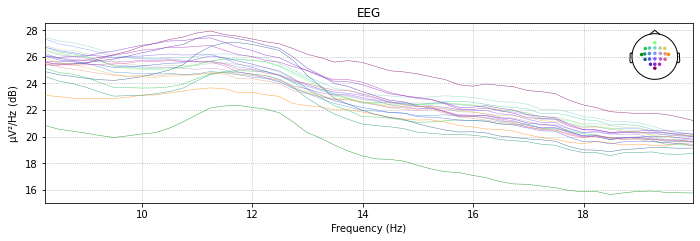

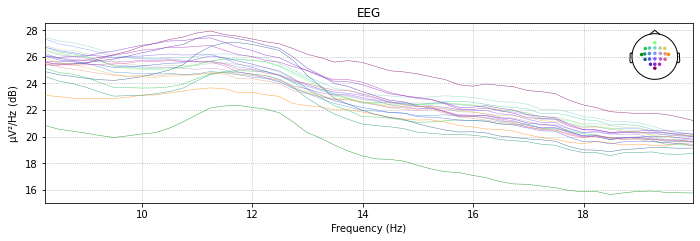

In [25]:
left_epoch.plot_psd(fmin=8,fmax=20)


In [32]:
diff = mne.combine_evoked((left_epoch,right_epoch),weights=[1,-1])

AttributeError: 'EpochsFIF' object has no attribute 'nave'

In [33]:
from mne.time_frequency import tfr_morlet
freqs = list(range(3,30))
left_tfr = tfr_morlet(left_epoch,freqs,3,return_itc=False)
right_tfr = tfr_morlet(right_epoch,freqs,3,return_itc=False)


No baseline correction applied
No baseline correction applied


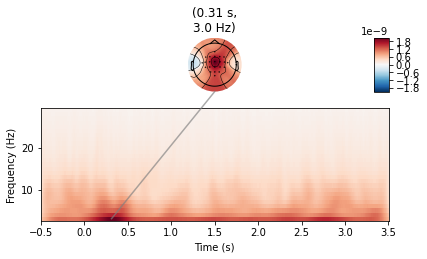

No baseline correction applied
No baseline correction applied


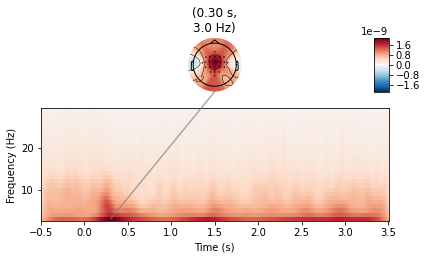

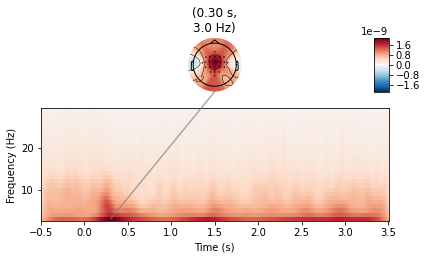

In [36]:
left_tfr.plot_joint()
right_tfr.plot_joint()

No baseline correction applied
No baseline correction applied


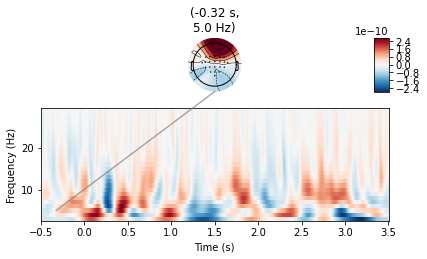

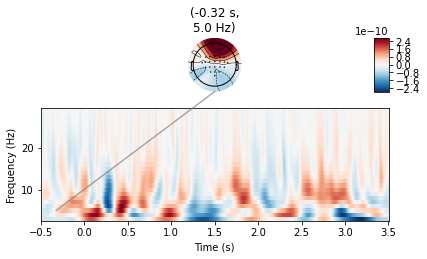

In [40]:
diff = mne.combine_evoked((left_tfr,right_tfr),weights=[1,-1])
diff.plot_joint()